<a href="https://colab.research.google.com/github/KashProgramming/DAML_Task4_DT/blob/main/DAML_Task4_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DAML Tasks/Task4/penguins.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [ ]:
# Dropping duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
# Finding out percentage of null values in each column
def get_null_percentages(df,columns):
    result={}
    for col in columns:
      null_count=df[col].isnull().sum()
      total_count=len(df)
      null_percentage=(null_count/total_count)*100
      result[col]=round(null_percentage,2)
    return result
null_percentages=get_null_percentages(df,df.columns)
for column,percentage in null_percentages.items():
  print(f"{column}: {percentage}%")

Unnamed: 0: 0.0%
species: 0.0%
island: 0.0%
bill_length_mm: 0.58%
bill_depth_mm: 0.58%
flipper_length_mm: 0.58%
body_mass_g: 0.58%
sex: 3.2%
year: 0.0%


In [ ]:
# Dropping all rows with null values in the columns bill_length, bill_depth and flipper_length
df.dropna(subset=["bill_length_mm"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         342 non-null    int64  
 1   species            342 non-null    object 
 2   island             342 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               342 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 26.7+ KB


In [ ]:
# Replacing null values in the column sex with the most common values
df["sex"].fillna(df["sex"].mode()[0],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         342 non-null    int64  
 1   species            342 non-null    object 
 2   island             342 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                342 non-null    object 
 8   year               342 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 26.7+ KB


<ipython-input-7-31c7f350270b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sex"].fillna(df["sex"].mode()[0],inplace=True)


In [ ]:
# Dropping unnecessary column
df.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
# Converting the sex column to numerical
gender={
    "male": 0,
    "female": 1
}
df["sex"]=df["sex"].map(gender)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0,2007


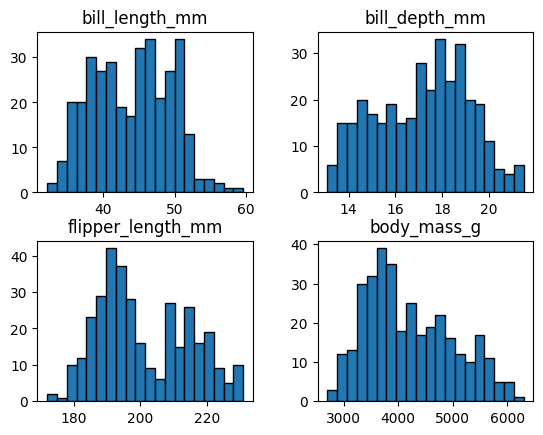

In [ ]:
# Creating histograms for 4 numerical features to understand their distribution
df[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]].hist(bins=20,edgecolor="black",grid=False)
plt.show()

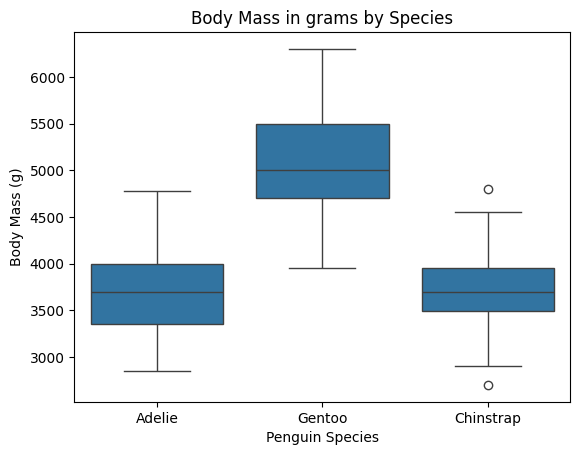

In [ ]:
# Creating box plot for body mass
# Inference: Median body mass of Gentoo is greater than the maximum body mass of Adelie and Chinstrap.
# Adelie has higher maximum body mass than Chinstrap, but similar median and minimum body mass.
sns.boxplot(x=df["species"],y=df["body_mass_g"])
plt.title("Body Mass in grams by Species")
plt.xlabel("Penguin Species")
plt.ylabel("Body Mass (g)")
plt.show()

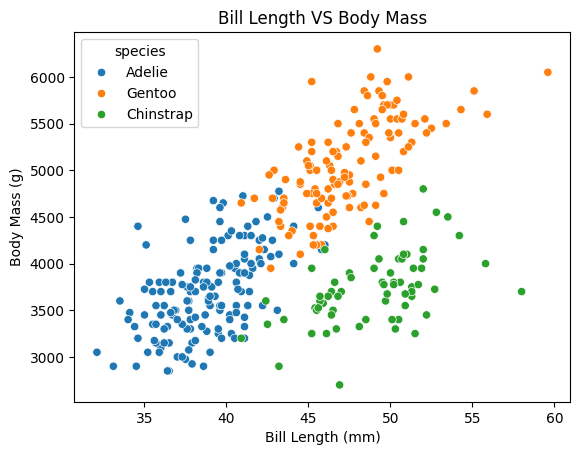

In [ ]:
# Creating a scatter plot for bill length and body mass
# Most Gentoo penguins have higher body mass than Adelie and Chinstrap.
# Gentoo and Chinstrap have similar bill length but higher than Adelie.
sns.scatterplot(x=df["bill_length_mm"],y=df["body_mass_g"],hue=df["species"])
plt.title("Bill Length VS Body Mass")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()

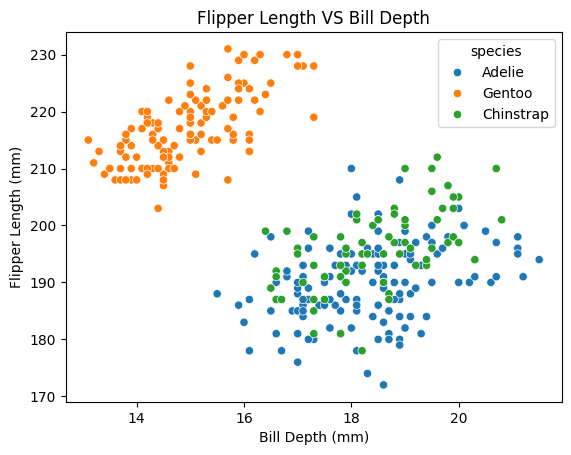

In [ ]:
# Creating a scatter plot for flipper length and bill depth
# Inference: Gentoo has lower bill depth and higher flipper length than the other 2 species.
# Adelie and Chinstrap have similar values for flipper length and bill depth.
sns.scatterplot(x=df["bill_depth_mm"],y=df["flipper_length_mm"],hue=df["species"])
plt.title("Flipper Length VS Bill Depth")
plt.xlabel("Bill Depth (mm)")
plt.ylabel("Flipper Length (mm)")
plt.show()

In [ ]:
# Encoding the categorical features including the target to have numerical values for the model
from sklearn.preprocessing import LabelEncoder
island_encoder=LabelEncoder()
species_encoder=LabelEncoder()
df["island"]=island_encoder.fit_transform(df["island"])
df["species"]=species_encoder.fit_transform(df["species"])
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,2,39.1,18.7,181.0,3750.0,0,2007
1,0,2,39.5,17.4,186.0,3800.0,1,2007
2,0,2,40.3,18.0,195.0,3250.0,1,2007
4,0,2,36.7,19.3,193.0,3450.0,1,2007
5,0,2,39.3,20.6,190.0,3650.0,0,2007


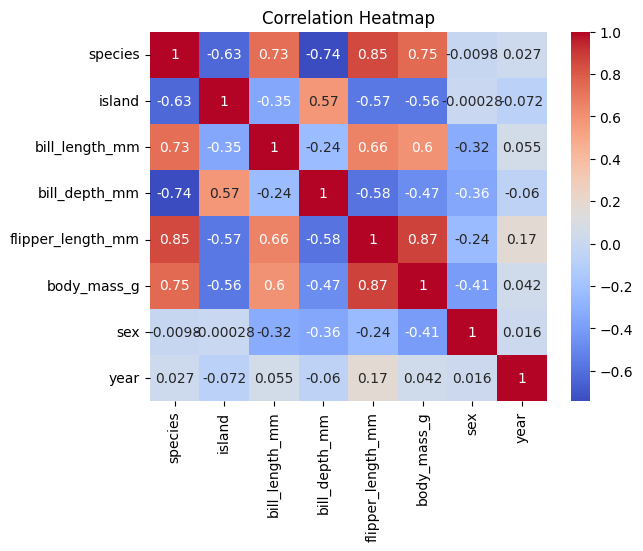

In [ ]:
# Creating a correlation heatmap to understand how correlated the features are
correlation=df.corr()
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(columns="species")
y=df["species"]
# Splitting the data into 65% train and 35% test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=42)

In [ ]:
# Creating and training a Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy = {accuracy}")
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Accuracy = 0.9666666666666667

Confusion Matrix:
 [[58  1  0]
 [ 2 19  0]
 [ 0  1 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        59
           1       0.90      0.90      0.90        21
           2       1.00      0.97      0.99        40

    accuracy                           0.97       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.97      0.97      0.97       120



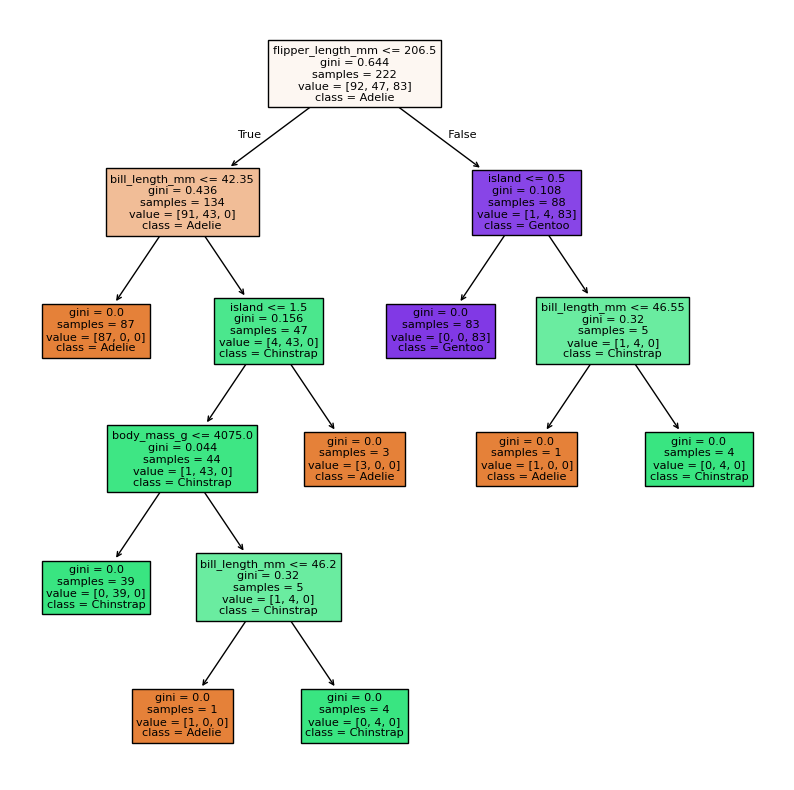

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(dt_clf,filled=True,feature_names=x.columns,class_names=species_encoder.classes_)
plt.show()

In [ ]:
import pickle
pickle.dump(dt_clf,open("/content/penguin_species_dt.pkl","wb"))

In [ ]:
pickle.dump(island_encoder,open("/content/island_encoder.pkl","wb"))
pickle.dump(species_encoder,open("/content/species_encoder.pkl","wb"))